# Devoir maison : numéro 1

In [1]:
import math as ma
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


# Question 1

##### voir fichier associé pour la démonstration

# Question 2

In [2]:
# Pour cette fonction on génère l'échantillon en fonction de sa taille (nEchantillon)
# et de sa loi (law = {uniform, exponential, normal})

def draw_sample(nEchantillon, law):
    if law == 'uniform':
        particle = np.random.uniform(0, 1, nEchantillon)
    elif law == 'exponential':
        particle = np.random.exponential(1, nEchantillon)
    elif law == 'normal':
        particle = np.random.normal(0, 1, nEchantillon)
    return particle


# Question 3

In [3]:
# Cette fonction permet de calculer l'estimateur In(f) 

def naive_MC(f, particle):
    estimateur = 0
    n = len(particle)
    for k in range(n):
        x = particle[k]
        estimateur = estimateur + f(x)
    estimateur = estimateur * (1/n)
    return estimateur

In [4]:
# fonction indicatrice (f(x) = 1 pour tout x appartenant à [0, 0.5])

def fonctiontest(x):
    output = 0
    if(x>=0 and x<=0.5):
        output = 1
    return output

naive_MC(fonctiontest, draw_sample(100, "uniform"))


0.59

'le biais est nul : True'

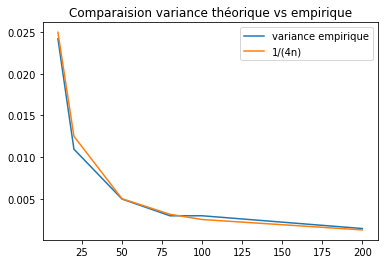

In [5]:
# J'ai defini cette fonction prenant en paramètre n caractérisant le nombre de fois qu'on calculera l'estimateur In(f)
# afin d'afficher la courbe, j'ai pris [10, 20, 50, 80, 100, 200] comme paramètre pour la fonction draw_sample
# Finalement, pour vérifier que le biais est nul, j'ai vérifier que sur chacun des échantillons, que la moyenne est nulle 
# à plus ou moins 0.1 près
# Dans le tracé de la courbe de la variance empirique, je l'ai comparé à la fonction f(n) = 1/(4n) car celle-ci représente 
# la variance théorique (Var(In(f)) = (1/n)*Var(f(X)) = (1/n)*p*(1 - p) avec p = 0.5 on obtient Var(In(f)) = 1/(4n))

def verifEsti(n):
    sample1 = []
    sample2 = []
    sample3 = []
    sample4 = []
    sample5 = []
    sample6 = []
    for k in range(n):
        sample1.append(naive_MC(fonctiontest, draw_sample(10, "uniform")))
    for k in range(n):
        sample2.append(naive_MC(fonctiontest, draw_sample(20, "uniform")))
    for k in range(n):
        sample3.append(naive_MC(fonctiontest, draw_sample(50, "uniform")))
    for k in range(n):
        sample4.append(naive_MC(fonctiontest, draw_sample(80, "uniform")))
    for k in range(n):
        sample5.append(naive_MC(fonctiontest, draw_sample(100, "uniform")))
    for k in range(n):
        sample6.append(naive_MC(fonctiontest, draw_sample(200, "uniform")))
    moyenne1 = np.mean(sample1)
    variance1 = np.var(sample1)
    moyenne2 = np.mean(sample2)
    variance2 = np.var(sample2)
    moyenne3 = np.mean(sample3)
    variance3 = np.var(sample3)
    moyenne4 = np.mean(sample4)
    variance4 = np.var(sample4)
    moyenne5 = np.mean(sample5)
    variance5 = np.var(sample5)
    moyenne6 = np.mean(sample6)
    variance6 = np.var(sample6)
    
    fig, ax = plt.subplots()
    ax.set_title("Comparaision variance théorique vs empirique")
    x = np.array([10, 20, 50, 80, 100, 200])
    
    y = np.array([variance1, variance2, variance3, variance4, variance5,variance6])
    ax.plot(x, y, label ='variance empirique')
    
    coeff = 1/4
    yprime = np.array([coeff/10, coeff/20, coeff/50, coeff/80, coeff/100, coeff/200])
    ax.plot(x, yprime, label = '1/(4n)')
    
    plt.legend()
    biais = np.allclose(moyenne1, moyenne2, 0.1) & np.allclose(moyenne2, moyenne3, 0.1) & \
    np.allclose(moyenne3, moyenne4, 0.1) & np.allclose(moyenne4, moyenne5, 0.1) & np.allclose(moyenne5, moyenne6, 0.1) 
    
    return "le biais est nul : %r" % biais

verifEsti(100)

# Question 4

##### voir fichier associé pour la démonstration

In [6]:
# fonction permettant de vérifier que notre intervalle de confiance est bon
# elle prend en paramètre le nombre de répétion de l'expérience et le nombre de valeurs échantilloné (j'ai fixé la valeur
# à 100 pour les deux paramètres)
# cette fonction renvoie *le rapport entre le nombre de fois que l'estimateur était dans l'intervalle et le nombre total de
# calcul de l'estimateur et (sous forme de boolean) *si cette valeur est compris entre [0.90, 1.0]


def verifAlpha(nRepetition, nEchantillon):
    mu = 1/2
    sigma = (1/2)
    
    compteFaux = 0
    compteVrai = 0
    for k in range(nRepetition):
        I100 = naive_MC(fonctiontest, draw_sample(nEchantillon, "uniform"))
        borneInf = -1.96 * (sigma / nEchantillon **(1/2)) + mu
        borneSup = 1.96 * (sigma / nEchantillon **(1/2)) + mu
        if I100> borneInf and I100 < borneSup:
            compteVrai = compteVrai + 1

    compteVrai = compteVrai/nRepetition
    
    return compteVrai, np.allclose(0.95, compteVrai, 0.05)

verifAlpha(100, 100)

(0.93, True)

# Question 5

##### voir fichier associé pour la démonstration

# Question 6

In [7]:
# On définit les trois fonctions permettant d'évaluer les polynomes de legendre, laguerre et hermite de degré k évalué au 
# point t

def legendre(k,t):
    K = k*[0] + [1]
    tprime = 2*t - 1
    polyLegendre = np.polynomial.legendre.legval(tprime, K)
    return polyLegendre

def laguerre(k,t):
    K = k*[0] + [1]
    polyLaguerre = np.polynomial.laguerre.lagval(t, K)
    return polyLaguerre

def hermite(k,t):
    K = k*[0] + [1]
    polyHermite = np.polynomial.hermite_e.hermeval(t, K)
    return polyHermite


C:\Users\antoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\antoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\antoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

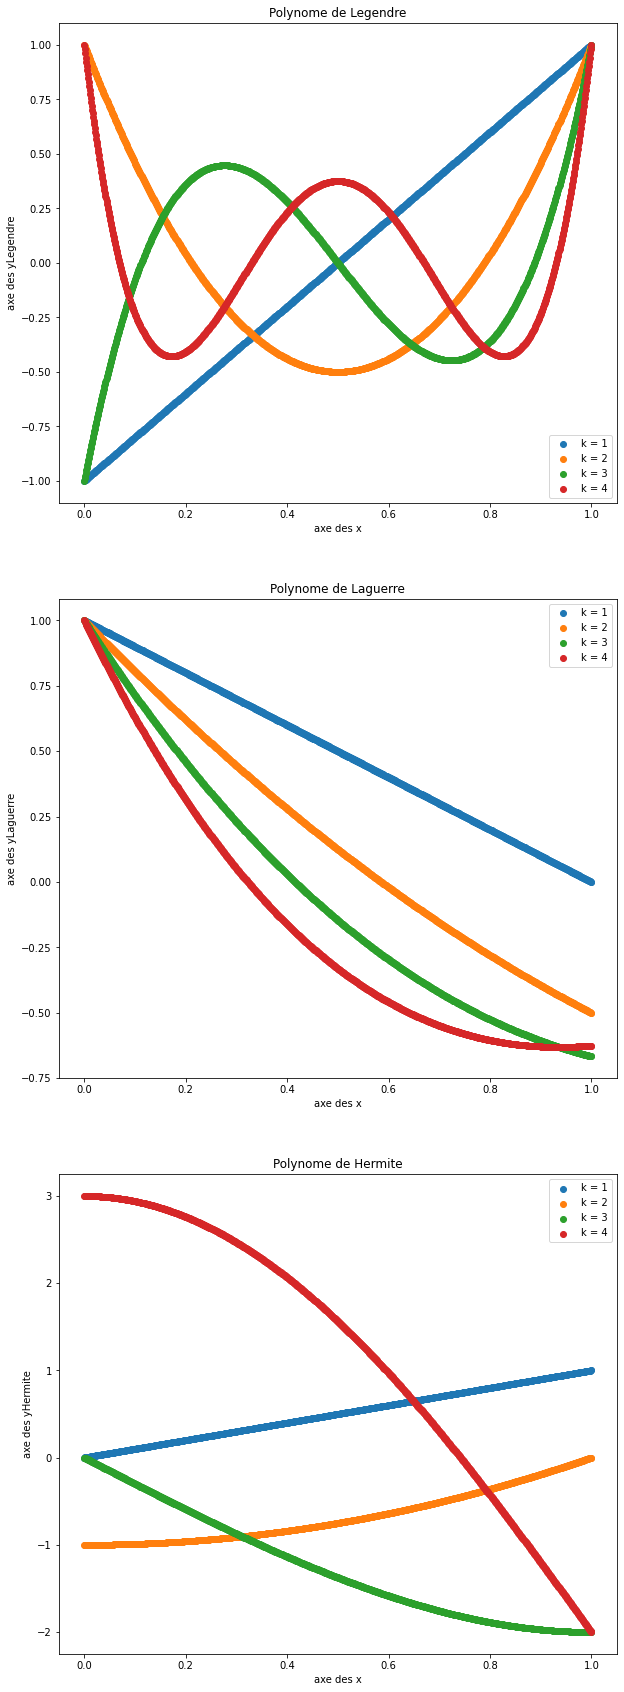

In [8]:
# fonction permettant de représenter les différents polynomes. Elle prend en paramètre K, le degré maximale du polynome 
# à représenter

def plotCurve(K):
    X = []

    Ylegendre = []
    Ylaguerre = []
    Yhermite = []
    for i in range(K):
        Ylegendre.append([])
        Ylaguerre.append([])
        Yhermite.append([])
        
    for i in range(1001):
        X.append(i*0.001)
        
    for i in X:
        for k in range(1, K+1):
            Ylegendre[k-1].append(legendre(k, i))
            Ylaguerre[k-1].append(laguerre(k, i))
            Yhermite[k-1].append(hermite(k, i))
            
    figure = plt.figure(figsize = (10, 30))
    for k in range(K):
        axes = figure.add_subplot(3, 1, 1)
        axes.set_title('Polynome de Legendre')
        axes.set_xlabel('axe des x')
        axes.set_ylabel('axe des yLegendre')
        plt.scatter(X, Ylegendre[k], label = 'k = %r'%(k+1))
        plt.legend()
        axes2 = figure.add_subplot(3, 1, 2)
        axes2.set_title('Polynome de Laguerre')
        axes2.set_xlabel('axe des x')
        axes2.set_ylabel('axe des yLaguerre')
        plt.scatter(X, Ylaguerre[k], label = 'k = %r'%(k+1))
        plt.legend()
        axes3 = figure.add_subplot(3, 1, 3)
        axes3.set_title('Polynome de Hermite')
        axes3.set_xlabel('axe des x')
        axes3.set_ylabel('axe des yHermite')
        plt.scatter(X, Yhermite[k], label = 'k = %r'%(k+1))
        plt.legend()
    
    return 

plotCurve(4)

# Question 7

In [9]:
# cette fonction permet de construire la matrice H

def get_H(X,m,basis):
    H = []
    
    if basis == "legendre":
        fonction = legendre
    elif basis == "laguerre":
        fonction = laguerre
    elif basis == "hermite":
        fonction = hermite
    else:
        return "choisir entre 'legendre', 'laguerre' ou 'hermite'"
    
    for k in range(m):
        hj = []
        for x in X:
            coeff = fonction(k+1, x)
            hj.append(coeff)
        H.append(hj)
    H = np.array(H)
    H = np.transpose(H)
    return H

C:\Users\antoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\antoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\antoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

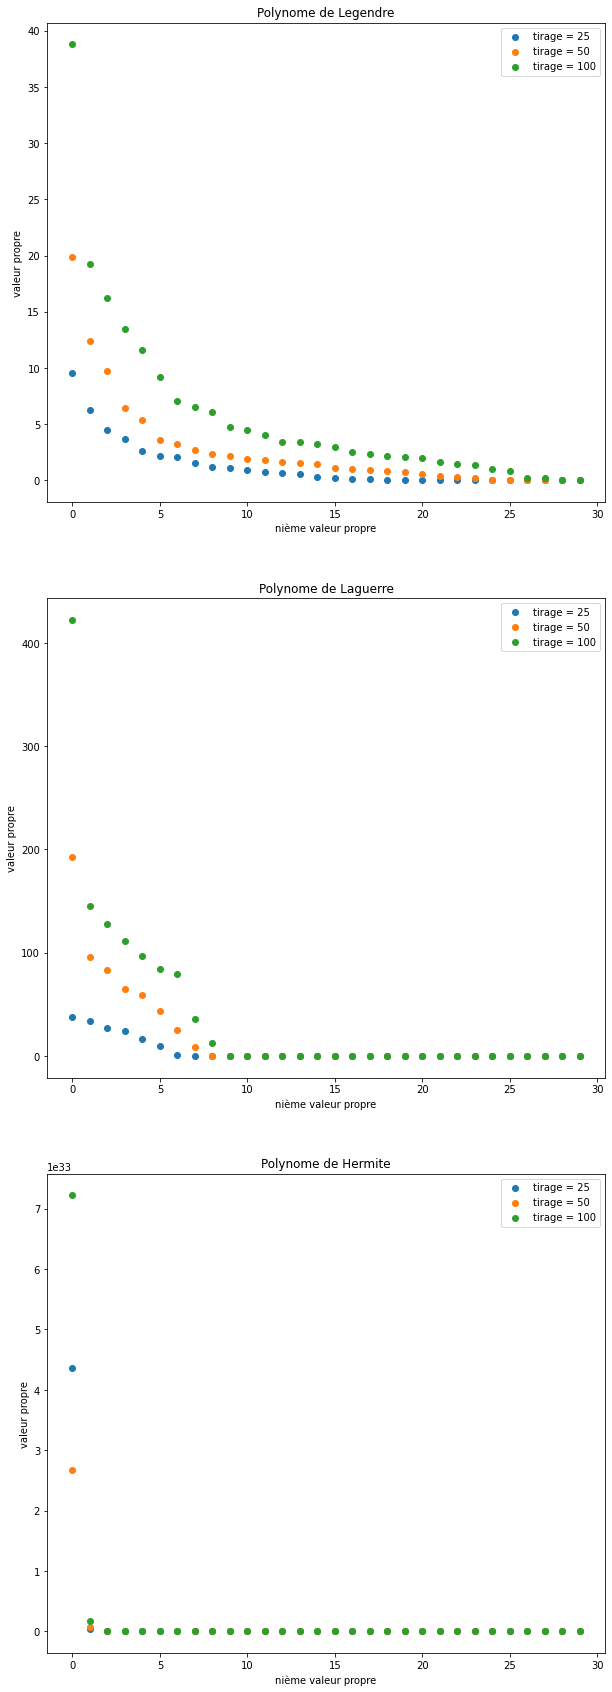

In [10]:
# on représente les différentes valeurs propres de HtH en fonction du choix du type de 
# polynome (base = {legendre, laguerre, hermite}) et du nombre de Xi tiré (tirage = {25, 50, 100})

def drawValue():
    base = {"legendre":'uniform', "laguerre":'exponential', "hermite":'normal'}
    tirage = [25, 50, 100]
    m = 30
    figure = plt.figure(figsize = (10, 30))
    for k in tirage:
        for cle, valeur in base.items():
            X = draw_sample(k, valeur)
            H = get_H(X, m, cle)
            Ht = np.transpose(H)
            HtH = np.dot(Ht,H)
            valpropre = np.linalg.eigvalsh(HtH)
            if cle == "legendre" :
                axes = figure.add_subplot(3, 1, 1)
                axes.set_title('Polynome de Legendre')
                axes.set_xlabel('nième valeur propre')
                axes.set_ylabel('valeur propre')
                plt.scatter(range(len(valpropre)), np.flip(valpropre), label = 'tirage = %r'%k)
                plt.legend()
            elif cle == "laguerre" :
                axes = figure.add_subplot(3, 1, 2)
                axes.set_title('Polynome de Laguerre')
                axes.set_xlabel('nième valeur propre')
                axes.set_ylabel('valeur propre')
                plt.scatter(range(len(valpropre)), np.flip(valpropre), label = 'tirage = %r'%k)
                plt.legend()
            else:
                axes = figure.add_subplot(3, 1, 3)
                axes.set_title('Polynome de Hermite')
                axes.set_xlabel('nième valeur propre')
                axes.set_ylabel('valeur propre')
                plt.scatter(range(len(valpropre)), np.flip(valpropre), label = 'tirage = %r'%k)
                plt.legend()
    
    return
drawValue()

# Fonctions de l'exercice

In [11]:
def f1(x):
    y = 4/(1+x**2)
    return y

def f2(x):
    y = 2*x**(1/2)
    return y

def ft(x, t=1.645):
    y = 0
    if x<t:
        y=1
    return y

# Question 8

In [12]:
# on défit deux fonctions de centrages. La première permet de centrer les éléments de la matrice H (centrage par colonne)
# la seconde fonction permet de centrer un vecteur colonne

def centrageH(matrice):
    matrice = np.transpose(matrice)
    newMatrice = []
    for k in range(len(matrice)):
        moy = np.mean(matrice[k])
        newMatrice.append(matrice[k] - moy)
    newMatrice = np.array(newMatrice)
    newMatrice = np.transpose(newMatrice)
    return newMatrice

def centrageF(vecteur):
    moyenne = vecteur.mean()
    shapeVecteur = np.shape(vecteur)
    newVect = []
    for i in range(shapeVecteur[0]):
        newVect.append(vecteur[i] - moyenne)
    return newVect


In [13]:
# dans la suite, je définis trois fonction drawBeta. 
# _ La première calcul les beta à l'aide de la formule (Hct.Hc)^-1.Hct.fc
#         avec Hct : H centré transposé, Hc : H centré et fc : f centré
# _ La seconde utilise la méthode LinearRegression de sklearn pour estimer les beta (H et f étant centrées, il n'y a pas 
# d'intercept)
# _ la dernière estime les beta à l'aide de la pseudo inverse de H (beta = H+f)


def drawBeta1(fonction, polynome, m):
    base = {"legendre":'uniform', "laguerre":'exponential', "hermite":'normal'}
    tirage = [25, 50, 100]
    for i in tirage:
        X = draw_sample(i, base[polynome])
        f = np.array([])
        for x in X:
            f = np.append(f, fonction(x))
        fc = centrageF(f)
        H = get_H(X, m, polynome)
        Hc = centrageH(H)
        model = linear_model.LinearRegression(fit_intercept=False)
        result = model.fit(Hc, fc)
        plt.plot(range(len(result.coef_)), result.coef_, label = 'tirage = %r'%i)
        plt.legend()
    
    return 

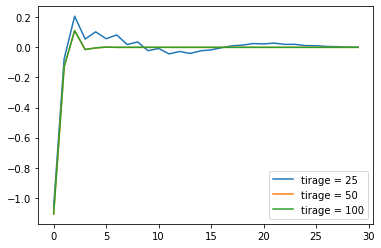

In [14]:
drawBeta1(f1, 'legendre', 30)

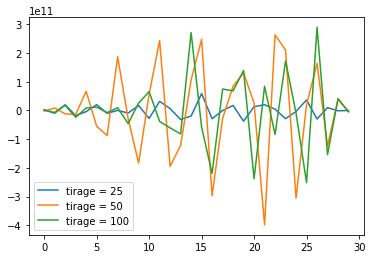

In [34]:
drawBeta1(f2, 'laguerre', 30)

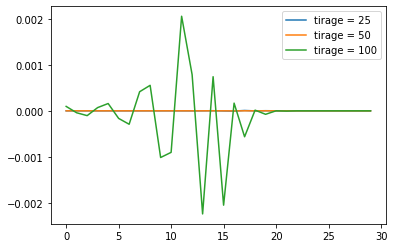

In [30]:
drawBeta1(ft, 'hermite', 30)

In [17]:
def drawBeta2(fonction, polynome, m):
    base = {"legendre":'uniform', "laguerre":'exponential', "hermite":'normal'}
    tirage = [25, 50, 100]
    for i in tirage:
        X = draw_sample(i, base[polynome])
        f = np.array([])
        for x in X:
            f = np.append(f, fonction(x))
        fc = centrageF(f)
        H = get_H(X, m, polynome)
        Hc = centrageH(H)
        Htc = np.transpose(Hc)
        beta = np.dot(np.dot(np.linalg.inv(np.dot(Htc, Hc)), Htc), fc)
    
        plt.plot(range(len(beta)), beta, label = 'tirage = %r'%i)
        plt.legend()
    
    return 


In [18]:
def drawBeta3(fonction, polynome, m):
    base = {"legendre":'uniform', "laguerre":'exponential', "hermite":'normal'}
    tirage = [25, 50, 100]
    for i in tirage:
        X = draw_sample(i, base[polynome])
        f = np.array([])
        for x in X:
            f = np.append(f, fonction(x))
        fc = centrageF(f)
        H = get_H(X, m, polynome)
        Hc = centrageH(H)

        beta = np.dot(np.linalg.pinv(Hc), fc)
        
        plt.plot(range(len(beta)), beta, label = 'tirage = %r'%i)
        plt.legend()
    
    return 


# Question 9

In [19]:
# de la même manière qu'à la question précédente, on estime les valeurs des intégrales f1, f2, ft à l'aide de : 
# _ la formule (Hct.Hc)^-1.Hct.fc avec Hct : H centré transposé, Hc : H centré et fc : f centré
# _ La seconde utilise la méthode LinearRegression de sklearn pour estimer les beta (H et f étant centrées, il n'y a pas 
#  d'intercept)
# _ la dernière estime les beta à l'aide de la pseudo inverse de H (beta = H+f)

def ols_MC1(fonction, m, basis, n):
    if basis == "legendre":
        law = "uniform"
    elif basis == "laguerre":
        law = "exponential"
    elif basis == "hermite":
        law = "normal"
    else:
        return "choisir entre 'legendre', 'laguerre' ou 'hermite'"
    
    X = draw_sample(n, law)

    f = np.array([])
    for x in X:
        y = fonction(x)
        f = np.append(f, y)
    
    fc = centrageF(f)

    H = get_H(X, m, basis)
    Hc = centrageH(H)
    
    Htc = np.transpose(Hc)
    result = np.dot(np.dot(np.linalg.inv(np.dot(Htc, Hc)), Htc), fc)
    esti = 0

    for i in range(n):
        coeff = 0
        for j in range(m):
            coeff = coeff + result[j]*H[i][j]
        esti = esti + f[i] - coeff
    esti = esti/n 
    return esti

print(ols_MC1(f1, 2, "legendre", 100))
print(ols_MC1(f2, 2, "laguerre", 100))
print(ols_MC1(ft, 2, "hermite", 100))

print(ols_MC1(f1, 4, "legendre", 100))
print(ols_MC1(f2, 4, "laguerre", 100))
print(ols_MC1(ft, 4, "hermite", 100))

print(ols_MC1(f1, 8, "legendre", 100))
print(ols_MC1(f2, 8, "laguerre", 100))
print(ols_MC1(ft, 8, "hermite", 100))

print(ols_MC1(f1, 16, "legendre", 100))
print(ols_MC1(f2, 16, "laguerre", 100))
print(ols_MC1(ft, 16, "hermite", 100))

3.130413819536782
1.7592222513802271
0.9586474111789818
3.14147176562563
1.7768773768904331
0.9450802617267579
3.141592379810998
-13.14405183030767
0.789886193715818
3.1415926535968164
387.7089043375639
2211.604691225779


In [20]:
def ols_MC2(fonction, m, basis, n):
    if basis == "legendre":
        law = "uniform"
    elif basis == "laguerre":
        law = "exponential"
    elif basis == "hermite":
        law = "normal"
    else:
        return "choisir entre 'legendre', 'laguerre' ou 'hermite'"
    
    X = draw_sample(n, law)

    f = np.array([])
    for x in X:
        y = fonction(x)
        f = np.append(f, y)
    
    fc = centrageF(f)

    H = get_H(X, m, basis)
    Hc = centrageH(H)
    
    model = linear_model.LinearRegression(fit_intercept=False)
    result = model.fit(Hc, fc)

    esti = 0

    for i in range(n):
        coeff = 0
        for j in range(m):
            coeff = coeff + result.coef_[j]*H[i][j]
        esti = esti + f[i] - coeff
    esti = esti/n 
    return esti

print(ols_MC2(f1, 2, "legendre", 100))
print(ols_MC2(f2, 2, "laguerre", 100))
print(ols_MC2(ft, 2, "hermite", 100))

print(ols_MC2(f1, 4, "legendre", 100))
print(ols_MC2(f2, 4, "laguerre", 100))
print(ols_MC2(ft, 4, "hermite", 100))

print(ols_MC2(f1, 8, "legendre", 100))
print(ols_MC2(f2, 8, "laguerre", 100))
print(ols_MC2(ft, 8, "hermite", 100))

print(ols_MC2(f1, 16, "legendre", 100))
print(ols_MC2(f2, 16, "laguerre", 100))
print(ols_MC2(ft, 16, "hermite", 100))


3.1406941994284363
1.7770432020568792
0.952565671673189
3.1416269164800865
1.7727572270080276
0.9117090444583258
3.1415929301926604
-11.873351086789107
0.932361589933317
3.141592653592329
65397522.460057475
-354.1745062188354


In [21]:
def ols_MC3(fonction, m, basis, n):
    if basis == "legendre":
        law = "uniform"
    elif basis == "laguerre":
        law = "exponential"
    elif basis == "hermite":
        law = "normal"
    else:
        return "choisir entre 'legendre', 'laguerre' ou 'hermite'"
    
    X = draw_sample(n, law)

    f = np.array([])
    for x in X:
        y = fonction(x)
        f = np.append(f, y)
    
    fc = centrageF(f)

    H = get_H(X, m, basis)
    Hc = centrageH(H)

    result = np.dot(np.linalg.pinv(Hc) , fc)
    esti = 0

    for i in range(n):
        coeff = 0
        for j in range(m):
            coeff = coeff + result[j]*H[i][j]
        esti = esti + f[i] - coeff
    esti = esti/n 
    return esti

print(ols_MC3(f1, 2, "legendre", 100))
print(ols_MC3(f2, 2, "laguerre", 100))
print(ols_MC3(ft, 2, "hermite", 100))

print(ols_MC3(f1, 4, "legendre", 100))
print(ols_MC3(f2, 4, "laguerre", 100))
print(ols_MC3(ft, 4, "hermite", 100))

print(ols_MC3(f1, 8, "legendre", 100))
print(ols_MC3(f2, 8, "laguerre", 100))
print(ols_MC3(ft, 8, "hermite", 100))

print(ols_MC3(f1, 16, "legendre", 100))
print(ols_MC3(f2, 16, "laguerre", 100))
print(ols_MC3(ft, 16, "hermite", 100))

# les résultats semblent meilleurs avec la pseudo inverse. A confirmer dans la suite.
# Pour les trois estimateur, plus m est faible, plus l'estimation sera bonne (le m a le même role que le d dans les MCO,
# plus m est grand, plus l'espace des feature est important donc plus les résultats sont incertains)

3.134295088057152
1.7846029472818983
0.9551129607843275
3.1414430690691124
1.7403263927804486
0.8950072770280904
3.1415918671794048
-9.321573052043583
2.0780461665860566
3.141592653619636
-18614888.578679677
511.9710909416208


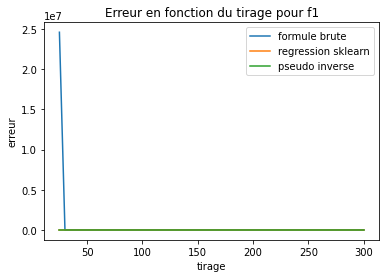

In [22]:
n = [25, 30, 40, 50, 70, 90, 100, 200, 300]

y1=[]
y2=[]
y3=[]

for i in n:
    y1.append((ols_MC1(f1, 30, "legendre", i) - ma.pi)**2)
    y2.append((ols_MC2(f1, 30, "legendre", i) - ma.pi)**2)
    y3.append((ols_MC3(f1, 30, "legendre", i) - ma.pi)**2)

fig, axes = plt.subplots()
axes.set_title('Erreur en fonction du tirage pour f1')
axes.set_xlabel('tirage')
axes.set_ylabel('erreur')
plt.plot(n, y1, label = "formule brute")
plt.plot(n, y2, label = "regression sklearn")
plt.plot(n, y3, label = "pseudo inverse")
plt.legend()

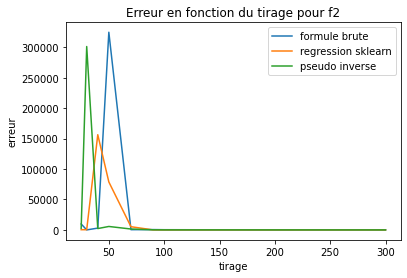

In [23]:
n = [25, 30, 40, 50, 70, 90, 100, 200, 300]
y1=[]
y2=[]
y3=[]
for i in n:
    y1.append((ols_MC1(f2, 8, "laguerre", i) - (ma.pi)**(1/2))**2)
    y2.append((ols_MC2(f2, 8, "laguerre", i) - (ma.pi)**(1/2))**2)
    y3.append((ols_MC3(f2, 8, "laguerre", i) - (ma.pi)**(1/2))**2)

fig, axes = plt.subplots()
axes.set_title('Erreur en fonction du tirage pour f2')
axes.set_xlabel('tirage')
axes.set_ylabel('erreur')
plt.plot(n, y1, label = "formule brute")
plt.plot(n, y2, label = "regression sklearn")
plt.plot(n, y3, label = "pseudo inverse")
plt.legend()
plt.legend()

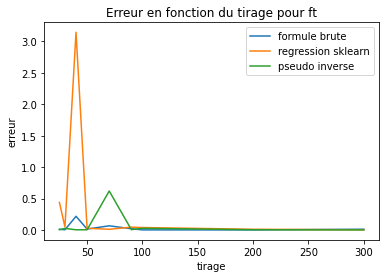

In [24]:
m = [25, 30, 40, 50, 70, 90, 100, 200, 300]
y1=[]
y2=[]
y3=[]
for i in n:
    y1.append((ols_MC1(ft, 8, "hermite", i) - 0.95)**2)
    y2.append((ols_MC2(ft, 8, "hermite", i) - 0.95)**2)
    y3.append((ols_MC3(ft, 8, "hermite", i) - 0.95)**2)
    
fig, axes = plt.subplots()
axes.set_title('Erreur en fonction du tirage pour ft')
axes.set_xlabel('tirage')
axes.set_ylabel('erreur')
plt.plot(n, y1, label = "formule brute")
plt.plot(n, y2, label = "regression sklearn")
plt.plot(n, y3, label = "pseudo inverse")
plt.legend()

# Il semble plus interessant d'utiliser la pseudo-inverse : à l'aide de cette dernière, l'estimateur converge plus rapidemen
# et les valeurs de m peuvent être plus élevés

# question 10

{'whiskers': [<matplotlib.lines.Line2D at 0x258e5450b08>,
 'caps': [<matplotlib.lines.Line2D at 0x258e54e3c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x258e52a9c08>,
 'medians': [<matplotlib.lines.Line2D at 0x258e389d708>,
 'fliers': [<matplotlib.lines.Line2D at 0x258e3877648>,
 'means': []}

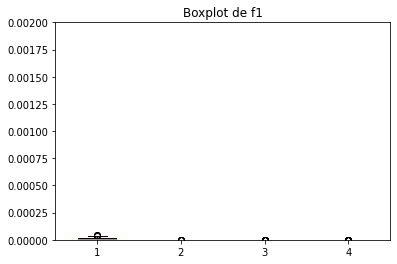

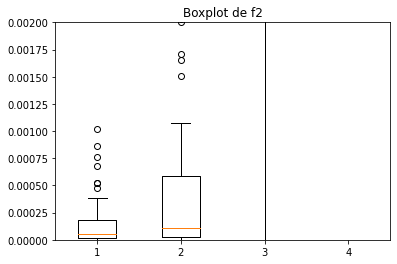

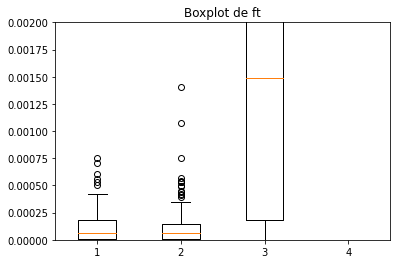

In [25]:
m = [2, 4, 8, 16]
boxplot=[]

for k in m:
    erreur = []
    for i in range(100):
        erreur.append((ols_MC2(f1, k, "legendre", 200) - ma.pi)**2)
    boxplot.append(erreur)
fig1, ax1 = plt.subplots()
ax1.set_title("Boxplot de f1")
plt.ylim(0, 0.002)
ax1.boxplot(boxplot)

boxplot=[]

for k in m:
    erreur = []
    for i in range(100):
        erreur.append((ols_MC2(f2, k, "laguerre", 200) - (ma.pi)**(1/2))**2)
    boxplot.append(erreur)
fig2, ax2 = plt.subplots()
ax2.set_title("Boxplot de f2")
plt.ylim(0, 0.002)
ax2.boxplot(boxplot)


boxplot=[]

for k in m:
    erreur = []
    for i in range(100):
        erreur.append((ols_MC2(ft, k, "hermite", 200) - 0.95)**2)
    boxplot.append(erreur)
fig3, ax3 = plt.subplots()
ax3.set_title("Boxplot de ft")
plt.ylim(0, 0.002)
ax3.boxplot(boxplot)

# Question 11

In [26]:
# On utlise la méthode lasso de sklearn pour ce dernier estimateur

def lasso(fonction, m, basis, n, alpha):
    if basis == "legendre":
        law = "uniform"
    elif basis == "laguerre":
        law = "exponential"
    elif basis == "hermite":
        law = "normal"
    else:
        return "choisir entre 'legendre', 'laguerre' ou 'hermite'"
    
    X = draw_sample(n, law)

    f = np.array([])
    for x in X:
        y = fonction(x)
        f = np.append(f, y)
    
    fc = centrageF(f)

    H = get_H(X, m, basis)
    Hc = centrageH(H)
    
    model = linear_model.Lasso(alpha, fit_intercept=False)
    result = model.fit(Hc, fc)

    esti = 0

    for i in range(n):
        coeff = 0
        for j in range(m):
            coeff = coeff + result.coef_[j]*H[i][j]
        esti = esti + f[i] - coeff
    esti = esti/n  

    return esti

print(lasso(f1, 30, "legendre", 200, 0.1))
print(lasso(f2, 30, "laguerre", 200, 0.1))
print(lasso(ft, 30, "hermite", 200, 0.1))

3.1460473718827653
1.7694215821237589
0.9692001975715495


C:\Users\antoi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9221864870273426, tolerance: 0.0008595000000000001
  positive)


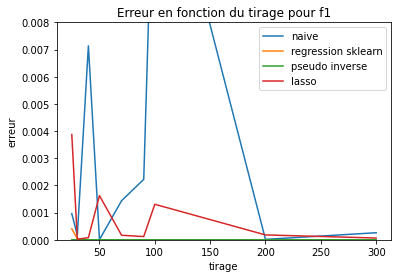

In [27]:
# cette dernière fonction va permettre de comparer l'erreur des différentes solutions implémentés dans ce devoir :
# on va comparer l'erreur de la fonction naive, de l'ols2 (regression à l'aide de sklearn), de l'ols3 (regression à l'aide 
# de la pseudo inverse) et enfin celle de la méthode Lasso

# Je modifie l'estimation naive afin que ses paramètres correspondent à ceux des autres fonctions

def naive_MC2(fonction, basis, n):
    if basis == "legendre":
        law = "uniform"
    elif basis == "laguerre":
        law = "exponential"
    elif basis == "hermite":
        law = "normal"
    else:
        return "choisir entre 'legendre', 'laguerre' ou 'hermite'"
    
    X = draw_sample(n, law)
    
    f = np.array([])
    for x in X:
        y = fonction(x)
        f = np.append(f, y)
    
    estimateur = 0

    for k in range(n):
        estimateur = estimateur + f[k]
    estimateur = estimateur * (1/n)
    return estimateur

# cette première comparaison est pour f1. J'ai fixé m = 30
n = [25, 30, 40, 50, 70, 90, 100, 200, 300]

y1=[]
y2=[]
y3=[]
y4=[]

for i in n:
    y1.append((naive_MC2(f1, "legendre", i) - ma.pi)**2)
    y2.append((ols_MC2(f1, 30, "legendre", i) - ma.pi)**2)
    y3.append((ols_MC3(f1, 30, "legendre", i) - ma.pi)**2)
    y4.append((lasso(f1, 30, "legendre", i, 0.1) - ma.pi)**2)

fig, axes = plt.subplots()
axes.set_title('Erreur en fonction du tirage pour f1')
axes.set_xlabel('tirage')
axes.set_ylabel('erreur')
axes.set_ylim(0, 0.008)
plt.plot(n, y1, label = "naive")
plt.plot(n, y2, label = "regression sklearn")
plt.plot(n, y3, label = "pseudo inverse")
plt.plot(n, y4, label = "lasso")
plt.legend()

# pour cette fonction, la regression sklearn et la pseudo inverse donne les meilleurs résultat. le lasso donne aussi des 
# résultats satisfaisant

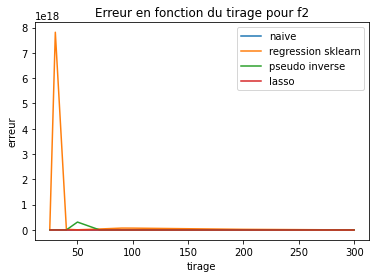

In [28]:
# cette seconde comparaison est pour f2. J'ai fixé m = 
n = [25, 30, 40, 50, 70, 90, 100, 200, 300]

y1=[]
y2=[]
y3=[]
y4=[]

for i in n:
    y1.append((naive_MC2(f2, "laguerre", i) - (ma.pi)**(1/2))**2)
    y2.append((ols_MC2(f2, 20, "laguerre", i) - (ma.pi)**(1/2))**2)
    y3.append((ols_MC3(f2, 20, "laguerre", i) - (ma.pi)**(1/2))**2)
    y4.append((lasso(f2, 20, "laguerre", i, 0.1) - (ma.pi)**(1/2))**2)

fig, axes = plt.subplots()
axes.set_title('Erreur en fonction du tirage pour f2')
axes.set_xlabel('tirage')
axes.set_ylabel('erreur')

plt.plot(n, y1, label = "naive")
plt.plot(n, y2, label = "regression sklearn")
plt.plot(n, y3, label = "pseudo inverse")
plt.plot(n, y4, label = "lasso")
plt.legend()

# à m = 30, le lasso est clairement la meilleur méthode. Pour m = 20, la pseudo inverse donne de bons résultat

C:\Users\antoi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022089318909324807, tolerance: 0.000184
  positive)
C:\Users\antoi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
C:\Users\antoi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.061026839744923615, tolerance: 9.75e-05
  positive)
C:\Users\antoi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
C:\Users

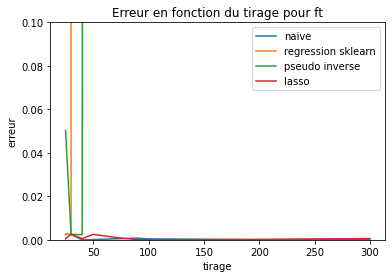

In [29]:
# cette seconde comparaison est pour f2. J'ai fixé m = 
n = [25, 30, 40, 50, 70, 90, 100, 200, 300]

y1=[]
y2=[]
y3=[]
y4=[]

for i in n:
    y1.append((naive_MC2(ft, "hermite", i) - 0.95)**2)
    y2.append((ols_MC2(ft, 20, "hermite", i) - 0.95)**2)
    y3.append((ols_MC3(ft, 20, "hermite", i) - 0.95)**2)
    y4.append((lasso(ft, 20, "hermite", i, 0.1) - 0.95)**2)

fig, axes = plt.subplots()
axes.set_title('Erreur en fonction du tirage pour ft')
axes.set_xlabel('tirage')
axes.set_ylabel('erreur')
axes.set_ylim(0, 0.1)
plt.plot(n, y1, label = "naive")
plt.plot(n, y2, label = "regression sklearn")
plt.plot(n, y3, label = "pseudo inverse")
plt.plot(n, y4, label = "lasso")
plt.legend()

# Etonnement, pour la fonction ft, les méthodes "regression sklearn" et à l'aide de la pseudo inverse ne donnent pas 
# de résultats satisfaisant alors que la fonction naive converge. Le lasso donne de bons résultats aussi.

# En conclusion, l'estimateur le plus adapté à toutes les situations semble être le lasso